<font size="5">Imports</font>

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

<font size="5">Read excel file 'active_fighters_by_country.xlsx'</font>

In [2]:
# Excel file obtained by scrapping UFC website. See ufc_stats_4.5.py for script.
df_fighters_country = pd.read_excel('active_fighters_by_country.xlsx',
                           usecols=['FighterName', 'Country']
                           )

df_fighters_country.head(5)

,FighterName,Country
0,GUIDO CANNETTI,Argentina
1,SILVANA JUAREZ,Argentina
2,ARMEN PETROSYAN,Armenia
3,JESSICA-ROSE CLARK,Australia
4,JIMMY CRUTE,Australia


<font size="5">Obtain count of fighters by country.</font>

In [3]:
df_country_counts = df_fighters_country.groupby(['Country']).count()
df_country_counts.head(10)

,FighterName
Country,
Argentina,2
Armenia,1
Australia,13
Austria,1
Brazil,79
Bulgaria,1
Canada,18
China,12
Czechia,2


In [4]:
df_country_counts['Country'] = df_country_counts.index
df_country_counts.rename(columns={'FighterName': 'CountFighters'},
                        inplace=True)
df_country_counts.head(5)

,CountFighters,Country
Country,,
Argentina,2,Argentina
Armenia,1,Armenia
Australia,13,Australia
Austria,1,Austria
Brazil,79,Brazil


<font size="5">Plot</font>

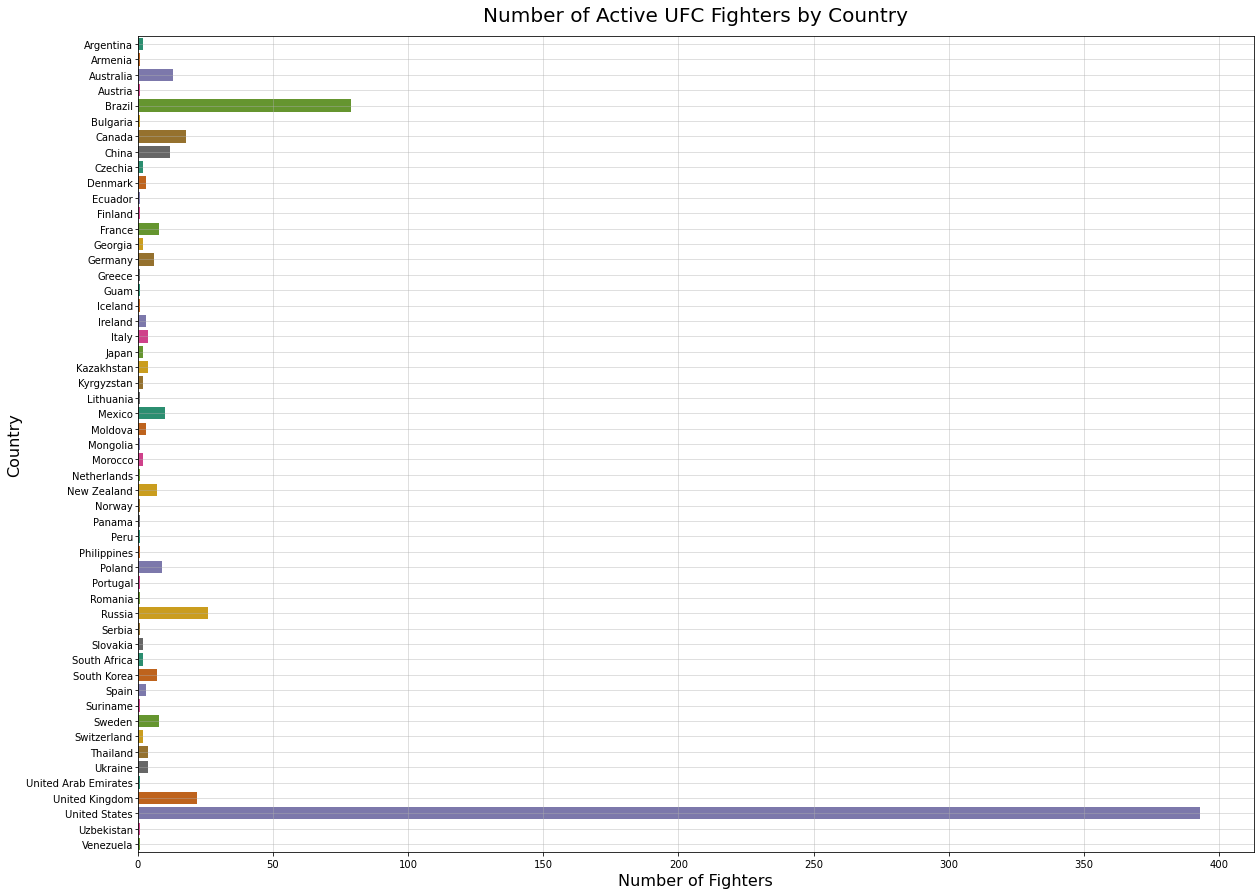

In [5]:
fig = plt.subplots(figsize=(20,15))

ax = sns.barplot(x='CountFighters', y='Country', data=df_country_counts,
                palette=sns.color_palette("Dark2")
                ) 

plt.grid(alpha=0.5)
ax.tick_params(axis='y', pad=1)

plt.title('Number of Active UFC Fighters by Country', fontsize=20, pad=15)
plt.xlabel('Number of Fighters', fontsize=16)
plt.ylabel('Country', fontsize=16)

plt.savefig('Number_of_Active_UFC_Fighters_by_Country.jpg')
plt.show()